# Animal Crossing New Horizons Accessories

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mp
import seaborn as sns

In [2]:
accessories = pd.read_csv('accessories.csv')

### Cleaning/EDA

In [3]:
accessories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222 entries, 0 to 221
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   222 non-null    object 
 1   Variation              222 non-null    object 
 2   DIY                    222 non-null    object 
 3   Buy                    222 non-null    object 
 4   Sell                   222 non-null    int64  
 5   Color 1                222 non-null    object 
 6   Color 2                222 non-null    object 
 7   Size                   222 non-null    object 
 8   Miles Price            1 non-null      float64
 9   Source                 222 non-null    object 
 10  Source Notes           206 non-null    object 
 11  Seasonal Availability  222 non-null    object 
 12  Mannequin Piece        222 non-null    object 
 13  Version                222 non-null    object 
 14  Style                  222 non-null    object 
 15  Label 

Changing Buy column to numeric

In [4]:
accessories.Buy.replace("NFS", np.nan, inplace=True)
accessories.Buy = pd.to_numeric(accessories.Buy)

In [5]:
accessories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222 entries, 0 to 221
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   222 non-null    object 
 1   Variation              222 non-null    object 
 2   DIY                    222 non-null    object 
 3   Buy                    210 non-null    float64
 4   Sell                   222 non-null    int64  
 5   Color 1                222 non-null    object 
 6   Color 2                222 non-null    object 
 7   Size                   222 non-null    object 
 8   Miles Price            1 non-null      float64
 9   Source                 222 non-null    object 
 10  Source Notes           206 non-null    object 
 11  Seasonal Availability  222 non-null    object 
 12  Mannequin Piece        222 non-null    object 
 13  Version                222 non-null    object 
 14  Style                  222 non-null    object 
 15  Label 

In [6]:
accessories.columns

Index(['Name', 'Variation', 'DIY', 'Buy', 'Sell', 'Color 1', 'Color 2', 'Size',
       'Miles Price', 'Source', 'Source Notes', 'Seasonal Availability',
       'Mannequin Piece', 'Version', 'Style', 'Label Themes', 'Type',
       'Villager Equippable', 'Catalog', 'Filename', 'Internal ID',
       'Unique Entry ID'],
      dtype='object')

Dropping columns that don't provide information

In [7]:
accessories.drop("Miles Price", axis=1, inplace = True)
accessories.drop("Size", axis=1, inplace = True)
accessories.drop("DIY", axis=1, inplace = True)
accessories.drop("Version", axis=1, inplace = True)

In [8]:
accessories.columns

Index(['Name', 'Variation', 'Buy', 'Sell', 'Color 1', 'Color 2', 'Source',
       'Source Notes', 'Seasonal Availability', 'Mannequin Piece', 'Style',
       'Label Themes', 'Type', 'Villager Equippable', 'Catalog', 'Filename',
       'Internal ID', 'Unique Entry ID'],
      dtype='object')

### Visualizations

[Text(0.5, 0, 'Buying Price'),
 Text(0, 0.5, 'Selling Price'),
 Text(0.5, 1.0, 'Correlation Between Prices of Animal Crossing Accessories')]

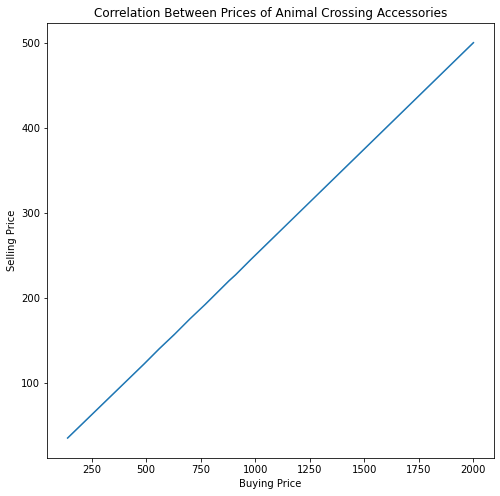

In [9]:
plt.figure(figsize=(8,8))
sns.lineplot(x='Buy', y='Sell', data=accessories).set(xlabel='Buying Price', ylabel='Selling Price', title='Correlation Between Prices of Animal Crossing Accessories')

[Text(0.5, 0, 'Type'),
 Text(0, 0.5, 'Buying Price'),
 Text(0.5, 1.0, 'Buying Price by Type')]

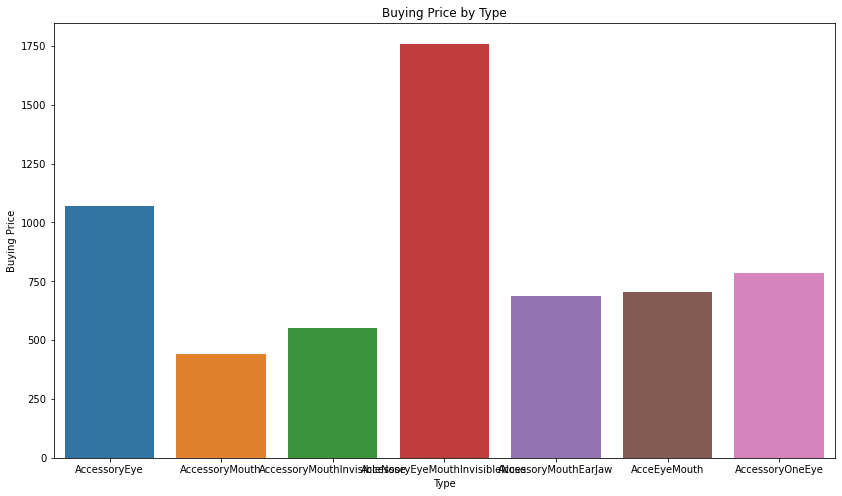

In [10]:
plt.figure(figsize=(14,8))
sns.barplot(x='Type', y='Buy', data=accessories, ci=None).set(xlabel='Type', ylabel='Buying Price', title='Buying Price by Type')

[Text(0, 0.5, 'Selling Price'), Text(0.5, 1.0, 'Selling Price by Style')]

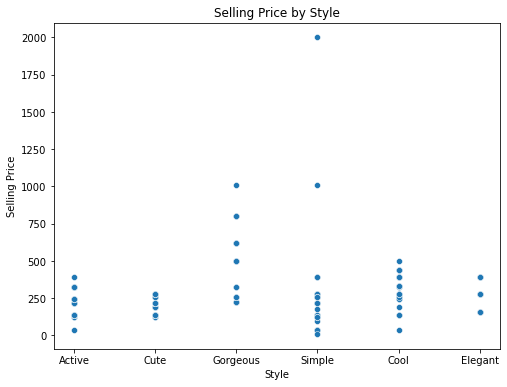

In [11]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Style', y='Sell', data=accessories).set(ylabel='Selling Price', title='Selling Price by Style')

[Text(0.5, 1.0, 'Style and Variation of Accessories')]

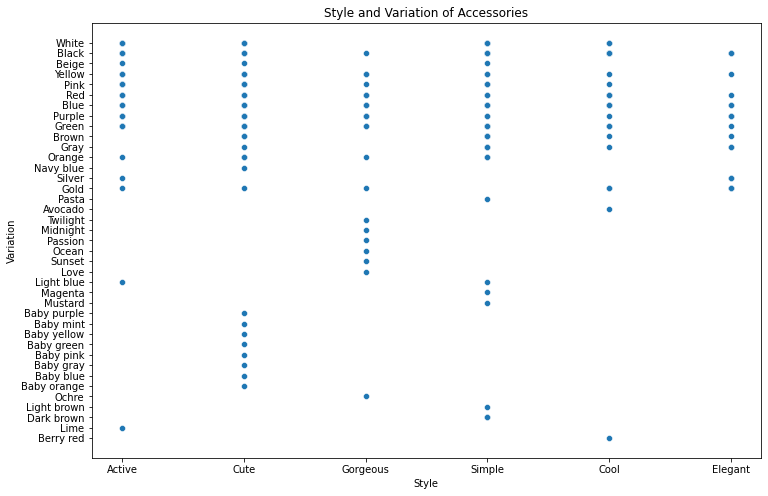

In [12]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Style', y='Variation', data=accessories, ci=None).set(title='Style and Variation of Accessories')

### Analysis

What is the average buying price for black glasses?

In [13]:
accessories[(accessories.Name.str.contains('glasses')) & (accessories.Variation == 'Black')].Buy.mean()

887.7777777777778

For items costing more than 1000 bells, what is the most common style?

In [14]:
accessories[accessories.Buy > 1000].Style.value_counts()

Cool        28
Simple      17
Elegant     14
Cute        13
Active      12
Gorgeous    11
Name: Style, dtype: int64

What is the average selling price for items availible during the Winter vs during the Summer?

In [15]:
accessories[(accessories['Seasonal Availability'] == 'Summer') | (accessories['Seasonal Availability'] == 'Winter')].groupby('Seasonal Availability').Sell.mean()

Seasonal Availability
Summer    140.0
Winter    245.0
Name: Sell, dtype: float64

For mannequin pieces that are villager equippable, what is the name and selling price?

In [16]:
accessories[(accessories['Villager Equippable'] == 'Yes') & (accessories['Mannequin Piece'] == 'Yes')].groupby(['Name', 'Sell']).Name.unique()

Name                   Sell
bottom-rimmed glasses  275     [bottom-rimmed glasses]
browline glasses       260          [browline glasses]
butterfly shades       260          [butterfly shades]
double-bridge glasses  275     [double-bridge glasses]
flower sunglasses      192         [flower sunglasses]
heart shades           260              [heart shades]
ladder shades          220             [ladder shades]
monocle                275                   [monocle]
octagonal glasses      275         [octagonal glasses]
oval glasses           220              [oval glasses]
pilot shades           325              [pilot shades]
pixel shades           330              [pixel shades]
retro shades           390              [retro shades]
rimmed glasses         157            [rimmed glasses]
round shades           390              [round shades]
round tinted shades    220       [round tinted shades]
ski goggles            245               [ski goggles]
square glasses         220           

For eyewear whose style is 'elegant', how many are multicolored and what are those items?

In [17]:
accessories[(accessories['Type'] == 'AccessoryEye') & (accessories['Style'] == 'Elegant') & (accessories['Color 1'] != accessories['Color 2'])].Name.unique()

array(['retro shades'], dtype=object)

Of the items that are considered formal, what is the style, main color, and buying price?

In [18]:
accessories[accessories['Label Themes'].str.contains('formal')][['Style', 'Color 1', 'Name', 'Buy']]

,Style,Color 1,Name,Buy
15,Simple,Black,browline glasses,1040.0
16,Simple,Brown,browline glasses,1040.0
17,Simple,Green,browline glasses,1040.0
18,Simple,Gray,browline glasses,1040.0
30,Gorgeous,White,candy-skull mask,NaN
31,Gorgeous,White,candy-skull mask,NaN
32,Gorgeous,White,candy-skull mask,NaN
37,Simple,Colorful,curly mustache,700.0
86,Elegant,Colorful,handlebar mustache,1120.0
97,Gorgeous,Purple,Labelle sunglasses,2000.0


For each type of facial accessory that is not for sale, how many of each style and variation are there?

In [19]:
accessories[accessories['Catalog'] == 'Not for sale'].groupby('Type')[['Style', 'Variation']].value_counts()

Type                            Style     Variation
AccessoryEye                    Gorgeous  Yellow       2
                                          Blue         1
                                          Pink         1
                                          Red          1
                                Simple    Black        1
                                          Blue         1
                                          Green        1
AccessoryEyeMouthInvisibleNose  Gorgeous  Blue         1
                                          Orange       1
                                          Purple       1
AccessoryMouth                  Simple    Green        1
dtype: int64

What are the minimum, median, and maximum selling prices for each style?

In [20]:
accessories.groupby('Style').Sell.agg([min, np.median, max])

,min,median,max
Style,,,
Active,35,220.0,390
Cool,35,327.5,500
Cute,122,192.0,275
Elegant,157,275.0,390
Gorgeous,227,500.0,1010
Simple,10,220.0,2000
